## Compare angle error and vs distance error

We found topographic effects in vsWM tasks (repulsion from the axis).  
As we want to study memory effect we want to use an error measure which is not affected by that.
Here we discuss why angle error / interference error is not the the most appropiate way to deal with topographic effect. 
We propose a measure that relaies on the distribution of cw-ccw trials, as it takes into account the distance between peaks.
Peaks will be independet of any topographic effect, thus capturing better the no-topographic effects.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. No topographic effects

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


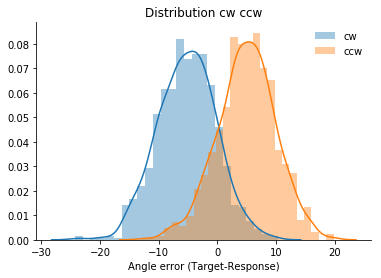

In [2]:
##Generate fake data
target=45
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10
response_cw = np.random.normal(target + real_error, 5, 1000)
response_ccw = np.random.normal(target - real_error, 5, 1000)

cw=pd.DataFrame({'response':response_cw})
cw['target'] = 45
cw['orient'] = 'cw'
cw['distractor'] = target + distractor_dit

ccw=pd.DataFrame({'response':response_ccw})
ccw['target'] = 45
ccw['orient'] = 'ccw'
ccw['distractor'] = target - distractor_dit

df=pd.concat([cw, ccw], ignore_index=True)
df['error'] = df['target'] - df['response']
df.head(10)

sns.distplot(df.loc[df['orient']=='cw', 'error'], label='cw')
sns.distplot(df.loc[df['orient']=='ccw', 'error'], label='ccw')
plt.title('Distribution cw ccw')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

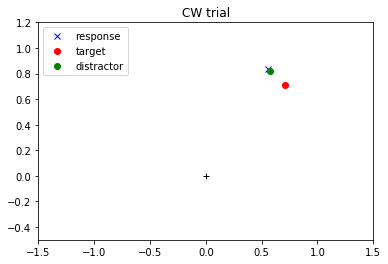

In [3]:
#### Visualize a cw trial
### target is cw to distractor.

ex_trial=6
plt.plot(0, 0, 'k+')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,0])    ), np.sin(    np.radians(df.iloc[ex_trial,0])    ), 'bx', label='response')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,1])    ), np.sin(    np.radians(df.iloc[ex_trial,1])    ), 'ro', label='target')
plt.plot( np.cos(   np.radians(df.iloc[ex_trial,3])    ), np.sin(    np.radians(df.iloc[ex_trial,3])    ), 'go', label='distractor')

plt.legend(loc=2)
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 1.2)
plt.title('CW trial')
plt.show()

##### Interference function

In [4]:
def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)




def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)

        interferences.append(Err_interference)
    
    return interferences



values = Interference_effects(   list(df['target']),   list(df['response']),  list(df['distractor'])  )
print( 'the real error is: ' + str(round(np.mean(values) )) )
df['interference_error'] = values


the real error is: 5.0


#### Distance function

In [5]:
def f_cw_ccw_distance(df, error_column, orient_column):
        ##### if you want to split by delay, eccentricity, ... , you should use this function in 
        ##### subsets or put it in a loop foor where to append many means_cw_ccw
        means_cw_ccw={}
        for ori in ['cw', 'ccw']:
            mean = round(df.loc[ df[orient_column]==ori,  error_column].mean(), 3)
            means_cw_ccw[ori] = mean


        cw_ccw_distance=[]
        for i in df.index:
            or_ = df.loc[i, orient_column]
            if or_ == 'cw':
                or_cont = 'ccw'
            elif or_ =='ccw':
                or_cont = 'cw' 
            else:
                print('Error')
            idx =  or_cont
            #
            if or_ == 'ccw':
                cw_ccw_distance.append(df.loc[i, error_column] - means_cw_ccw[idx] )  
            elif or_ =='cw':
                cw_ccw_distance.append( means_cw_ccw[idx] - df.loc[i, error_column])  
            else:
                print('Error')
        
        
        ###
        return np.array(cw_ccw_distance)/2 
        
    

values = f_cw_ccw_distance( df, 'error', 'orient' )
print( 'the real error is: ' + str(round(np.mean(values) )) )
df['error distance'] = values

the real error is: 5.0


***Both work exactly the same way without topographic effects!***  
  
    


### 2. Topographic effects

***Let's asume there is a general cw bias***  
Ilustration:  

![](imgs\\example.png)

 ***WE WANT A MEASURE THAT GETS RID OF THIS AND JUST CAPTURES THE REAL ERROR!!!!***  
 My mesure should give Me the real error (5 degrees ) and ignore the shifts of the system  
 I will reproduce the same as THE ILUSTRATION, the target enters in the systems shifted by 10 deg!  
 effect axis = 10 degrees

In [6]:
effect_axis=10 #

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


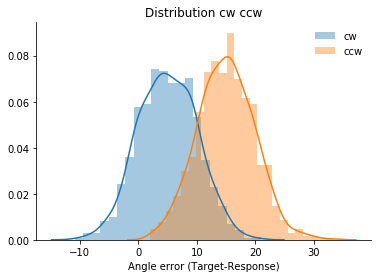

In [7]:
##Generate fake data
target=80
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10

response_cw = np.random.normal(target - effect_axis + real_error, 5, 1000)
response_ccw = np.random.normal(target- effect_axis - real_error, 5, 1000)

cw=pd.DataFrame({'response':response_cw})
cw['target'] = target
cw['orient'] = 'cw'
cw['distractor'] = target + distractor_dit

ccw=pd.DataFrame({'response':response_ccw})
ccw['target'] = target
ccw['orient'] = 'ccw'
ccw['distractor'] = target - distractor_dit

df=pd.concat([cw, ccw], ignore_index=True)
df['error'] = df['target'] - df['response']
df.head(10)


sns.distplot(df.loc[df['orient']=='cw', 'error'], label='cw')
sns.distplot(df.loc[df['orient']=='ccw', 'error'], label='ccw')
plt.title('Distribution cw ccw')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

In [8]:
values = Interference_effects(   list(df['target']),   list(df['response']),  list(df['distractor'])  )
print( 'the real error is: ' + str(round(np.mean(values) )) )
df['interference_error'] = values

the real error is: 2.0


In [9]:
values = f_cw_ccw_distance( df, 'error', 'orient' )
print( 'the real error is: ' + str(round(np.mean(values) )) )
df['error distance'] = values

the real error is: 5.0


As long as we have the cw-ccw distribution, the best way to get rid of all the topographic effect that we find is by looking at the distance between the peacks of cw-ccw distributions instead of computing the difference Target-Response! 

### 3. Topographic effects: repulsion from each axis

Before we were asuming a cw bias for all the tragets, now I will simulate a repulsive effect for all the axis ( drift to center of the quadrant), both for the horizontal and vertical axis.

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


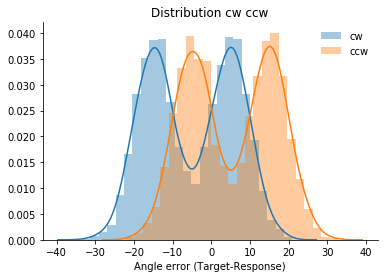

In [18]:
##
effect_axis=10 #

##df1
target=80
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10

response_cw = np.random.normal(target - effect_axis + real_error, 5, 1000)
response_ccw = np.random.normal(target- effect_axis - real_error, 5, 1000)

cw=pd.DataFrame({'response':response_cw})
cw['target'] = target
cw['orient'] = 'cw'
cw['distractor'] = target + distractor_dit

ccw=pd.DataFrame({'response':response_ccw})
ccw['target'] = target
ccw['orient'] = 'ccw'
ccw['distractor'] = target - distractor_dit


##df2
target=10
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10

response_cw = np.random.normal(target + effect_axis + real_error, 5, 1000)
response_ccw = np.random.normal(target + effect_axis - real_error, 5, 1000)

cw2=pd.DataFrame({'response':response_cw})
cw2['target'] = target
cw2['orient'] = 'cw'
cw2['distractor'] = target + distractor_dit

ccw2=pd.DataFrame({'response':response_ccw})
ccw2['target'] = target
ccw2['orient'] = 'ccw'
ccw2['distractor'] = target - distractor_dit

##df3
target=80+90
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10

response_cw = np.random.normal(target - effect_axis + real_error, 5, 1000)
response_ccw = np.random.normal(target- effect_axis - real_error, 5, 1000)

cw3=pd.DataFrame({'response':response_cw})
cw3['target'] = target
cw3['orient'] = 'cw'
cw3['distractor'] = target + distractor_dit

ccw3=pd.DataFrame({'response':response_ccw})
ccw3['target'] = target
ccw3['orient'] = 'ccw'
ccw3['distractor'] = target - distractor_dit


##df4
target=10+90
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10

response_cw = np.random.normal(target + effect_axis + real_error, 5, 1000)
response_ccw = np.random.normal(target + effect_axis - real_error, 5, 1000)

cw4=pd.DataFrame({'response':response_cw})
cw4['target'] = target
cw4['orient'] = 'cw'
cw4['distractor'] = target + distractor_dit

ccw4=pd.DataFrame({'response':response_ccw})
ccw4['target'] = target
ccw4['orient'] = 'ccw'
ccw4['distractor'] = target - distractor_dit

##df5
target=80+180
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10

response_cw = np.random.normal(target - effect_axis + real_error, 5, 1000)
response_ccw = np.random.normal(target- effect_axis - real_error, 5, 1000)

cw5=pd.DataFrame({'response':response_cw})
cw5['target'] = target
cw5['orient'] = 'cw'
cw5['distractor'] = target + distractor_dit

ccw5=pd.DataFrame({'response':response_ccw})
ccw5['target'] = target
ccw5['orient'] = 'ccw'
ccw5['distractor'] = target - distractor_dit


##df6
target=10+180
real_error = 5 ## attraction of 5 degrees
distractor_dit = 10

response_cw = np.random.normal(target + effect_axis + real_error, 5, 1000)
response_ccw = np.random.normal(target + effect_axis - real_error, 5, 1000)

cw6=pd.DataFrame({'response':response_cw})
cw6['target'] = target
cw6['orient'] = 'cw'
cw6['distractor'] = target + distractor_dit

ccw6=pd.DataFrame({'response':response_ccw})
ccw6['target'] = target
ccw6['orient'] = 'ccw'
ccw6['distractor'] = target - distractor_dit




df=pd.concat([cw, ccw, cw2, ccw2, cw3, ccw3, cw4, ccw4, cw5, ccw5, cw6, ccw6], ignore_index=True)
df['error'] = df['target'] - df['response']
df.head(10)

sns.distplot(df.loc[df['orient']=='cw', 'error'], label='cw')
sns.distplot(df.loc[df['orient']=='ccw', 'error'], label='ccw')
plt.title('Distribution cw ccw')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()


In [19]:
values = Interference_effects(   list(df['target']),   list(df['response']),  list(df['distractor'])  )
print( 'the real error is: ' + str(round(np.mean(values) )) )
df['interference_error'] = values

the real error is: 1.0


In [20]:
values = f_cw_ccw_distance( df, 'error', 'orient' )
print( 'the real error is: ' + str(round(np.mean(values) )) )
df['error distance'] = values

the real error is: 5.0
